In [1]:
import re

import numpy as np

from matplotlib import pyplot as plt
from IPython.display import display, Markdown
from pathlib import Path
from collections import defaultdict

In [2]:
BIODIVERSITY_PATTERN = re.compile(r"The simulation resulted in a biodiversity of (\d+) unique species\.")
EXECUTION_PATTERN = re.compile(r"The simulation took:\n - initialisation: ([^\n]+)\n - execution: ([^\n]+)\n - cleanup: ([^\n]+)\n")

In [3]:
TIME_PATTERN = re.compile(r"(\d+\.\d+)([^\d]+)")
TIME_UNITS = {
    "ns": 0.000000001,
    "µs": 0.000001,
    "ms": 0.001,
    "s": 1.0,
}

def parse_time(time_str):
    match = TIME_PATTERN.match(time_str)
    
    if match is None:
        return None
    
    return float(match.group(1)) * TIME_UNITS[match.group(2)]

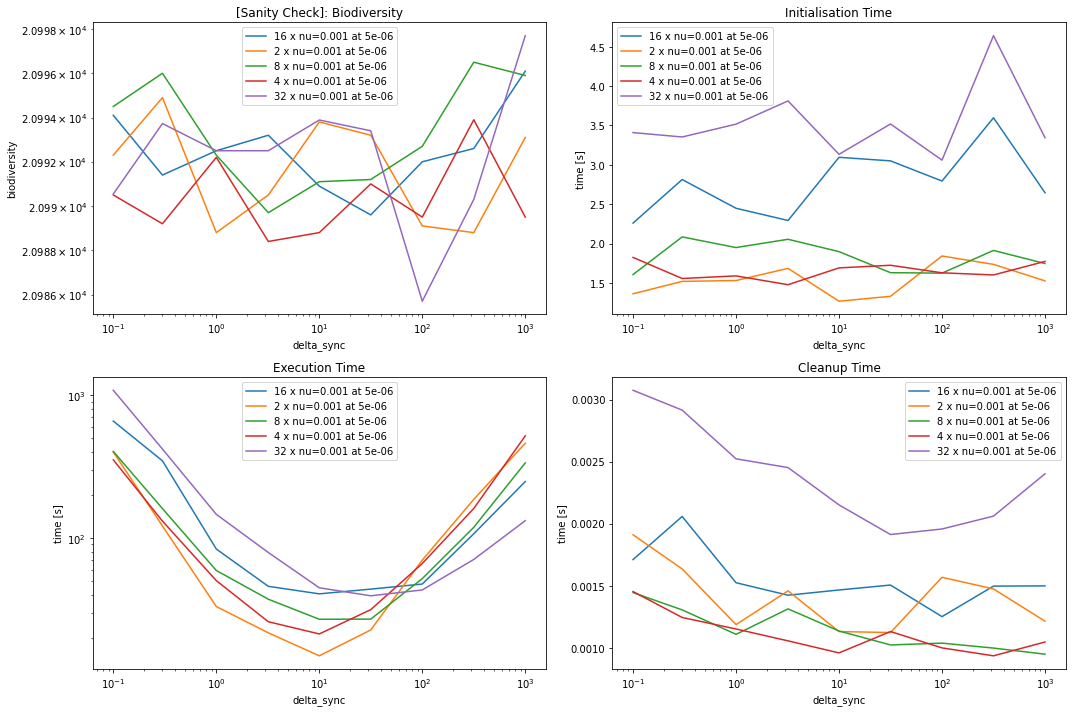

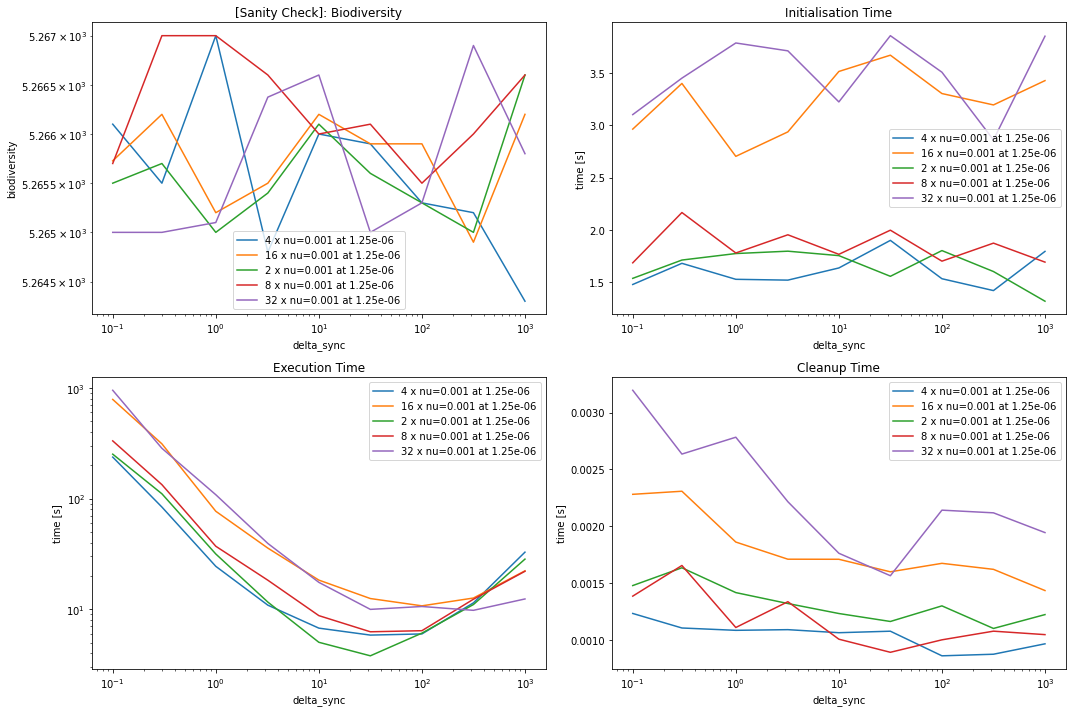

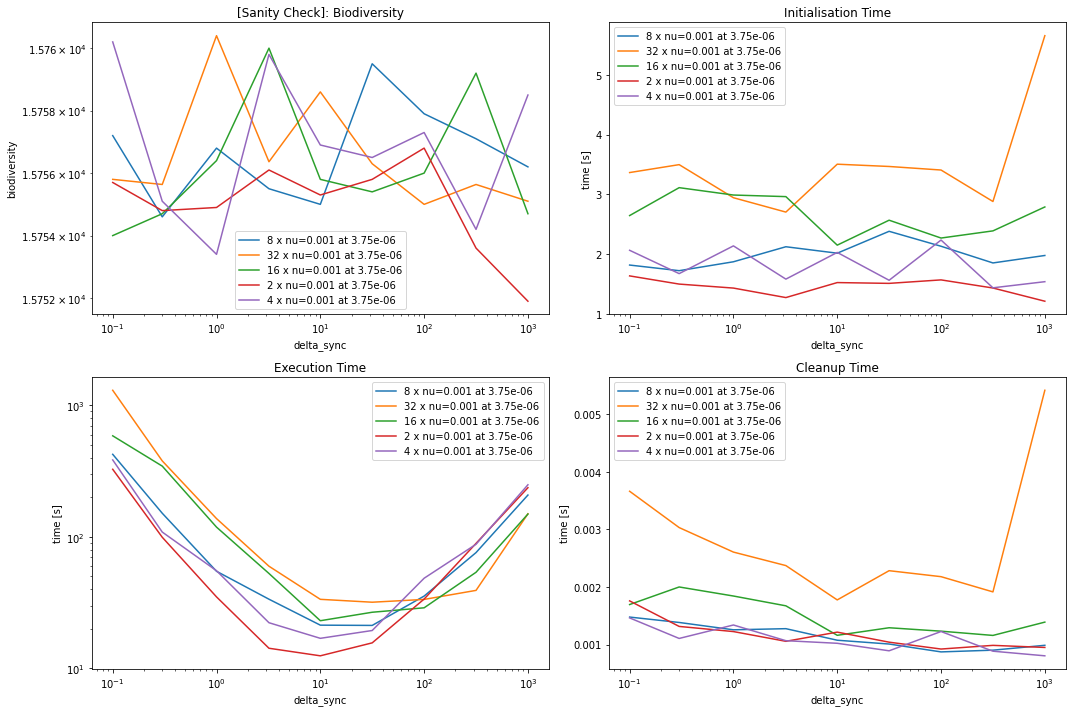

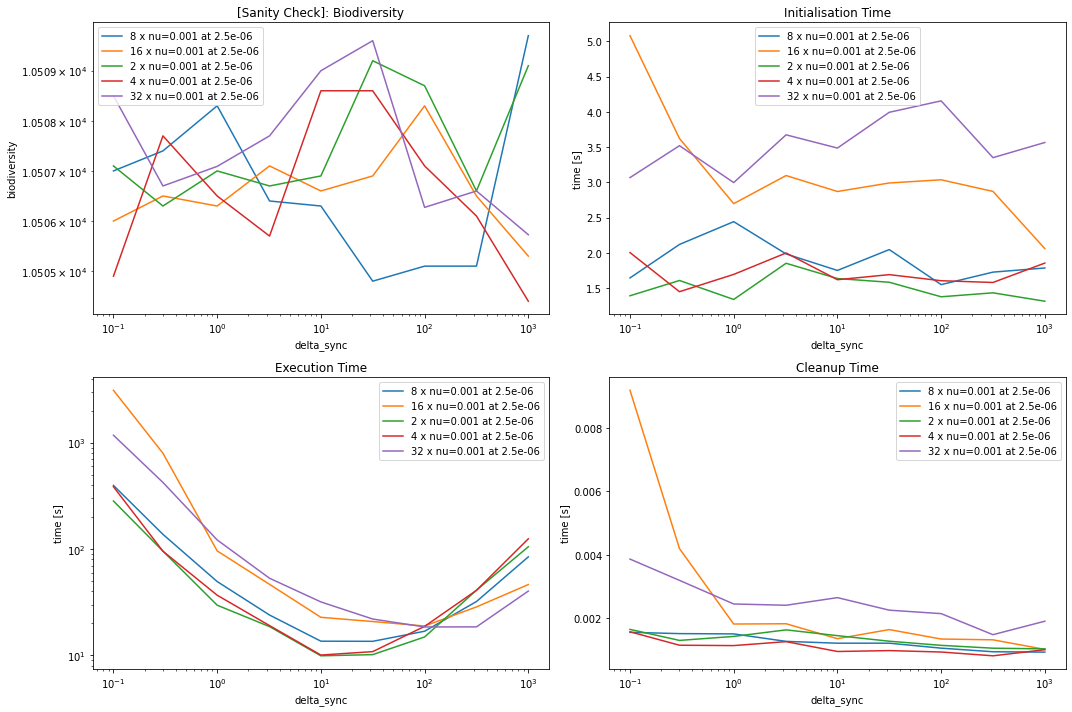

In [4]:
OPTIMISTIC_FILE_PATTERN = re.compile(r"pbs\.(\d+)\.([+\-]?(?:0|[1-9]\d*)(?:\.\d*)?(?:[eE][+\-]?\d+)?)\.([+\-]?(?:0|[1-9]\d*)(?:\.\d*)?(?:[eE][+\-]?\d+)?)\.([+\-]?(?:0|[1-9]\d*)(?:\.\d*)?(?:[eE][+\-]?\d+)?)\.o\d+\.\d+")

results = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))

for path in Path("optimistic").iterdir():
    match = OPTIMISTIC_FILE_PATTERN.match(path.name)
    
    if match is None:
        continue
    
    partitions = int(match.group(1))
    speciation = float(match.group(2))
    sample = float(match.group(3))
    delta_sync = float(match.group(4))
    
    with open(path) as file:
        stdout = file.read()
    
    match = BIODIVERSITY_PATTERN.search(stdout)
    if match is None:
        continue
    biodiversity = int(match.group(1))

    match = EXECUTION_PATTERN.search(stdout)
    if match is None:
        continue
    initialisation = parse_time(match.group(1))
    execution = parse_time(match.group(2))
    cleanup = parse_time(match.group(3))
    
    results[(speciation, sample)][partitions][delta_sync].append((biodiversity, initialisation, execution, cleanup))
    
for (speciation, sample), entries in results.items():
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    
    ax1.set_title("[Sanity Check]: Biodiversity")
    ax1.set_xlabel("delta_sync")
    ax1.set_ylabel("biodiversity")
    ax1.set_xscale("log")
    ax1.set_yscale("log")
    
    ax2.set_title("Initialisation Time")
    ax2.set_xlabel("delta_sync")
    ax2.set_ylabel("time [s]")
    ax2.set_xscale("log")
    
    ax3.set_title("Execution Time")
    ax3.set_xlabel("delta_sync")
    ax3.set_ylabel("time [s]")
    ax3.set_xscale("log")
    ax3.set_yscale("log")
    
    ax4.set_title("Cleanup Time")
    ax4.set_xlabel("delta_sync")
    ax4.set_ylabel("time [s]")
    ax4.set_xscale("log")
    
    for partitions, measures in entries.items():
        measures = { delta_sync: [np.mean(s) for s in zip(*measure)] for delta_sync, measure in measures.items() }

        delta_syncs, biodiversities, initialisations, executions, cleanups = zip(*sorted([delta_sync] + rs for delta_sync, rs in measures.items()))

        ax1.plot(delta_syncs, biodiversities, label=f"{partitions} x nu={speciation} at {sample}")
        ax2.plot(delta_syncs, initialisations, label=f"{partitions} x nu={speciation} at {sample}")
        ax3.plot(delta_syncs, executions, label=f"{partitions} x nu={speciation} at {sample}")
        ax4.plot(delta_syncs, cleanups, label=f"{partitions} x nu={speciation} at {sample}")
    
    ax1.legend()
    ax2.legend()
    ax3.legend()
    ax4.legend()

    plt.tight_layout()
    plt.show()

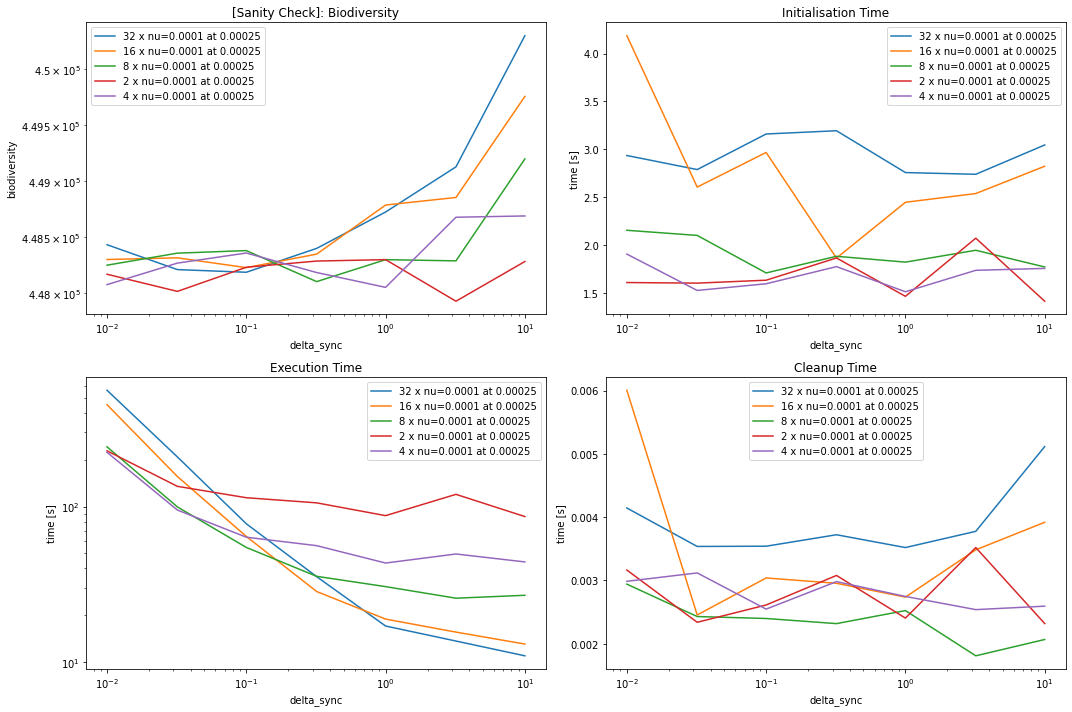

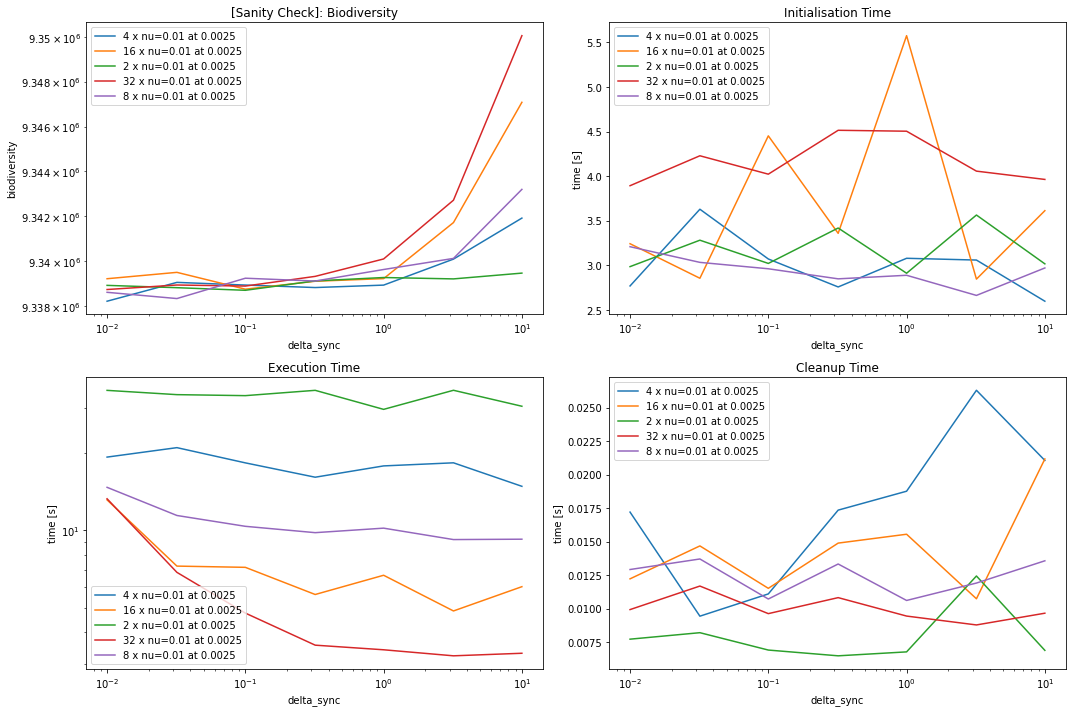

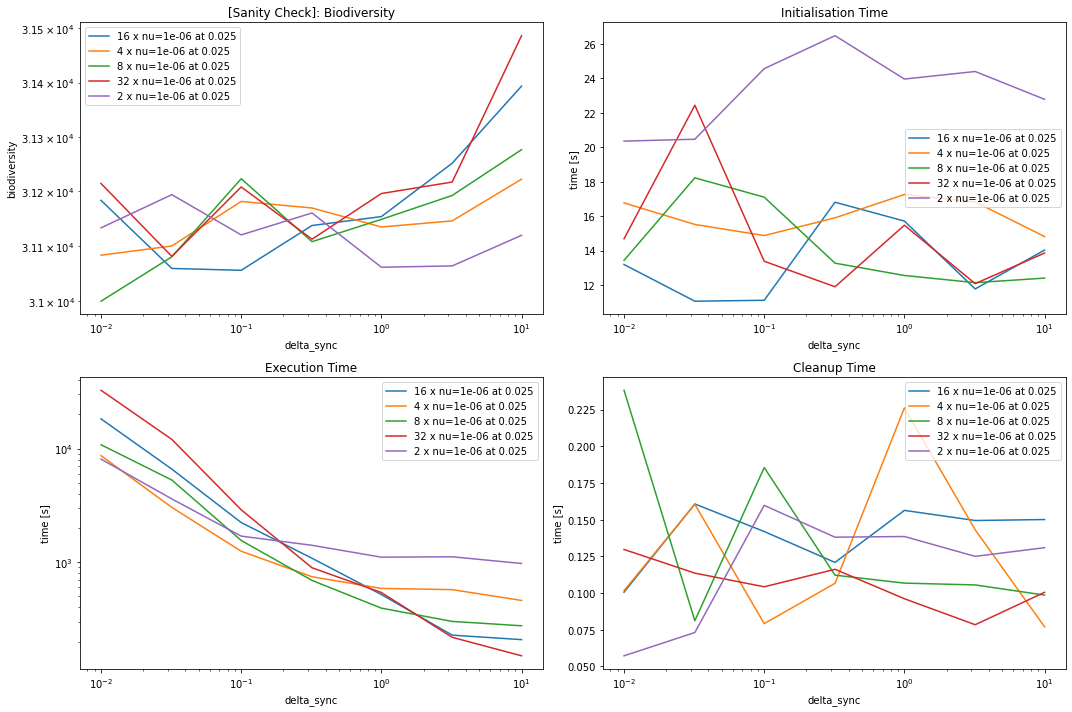

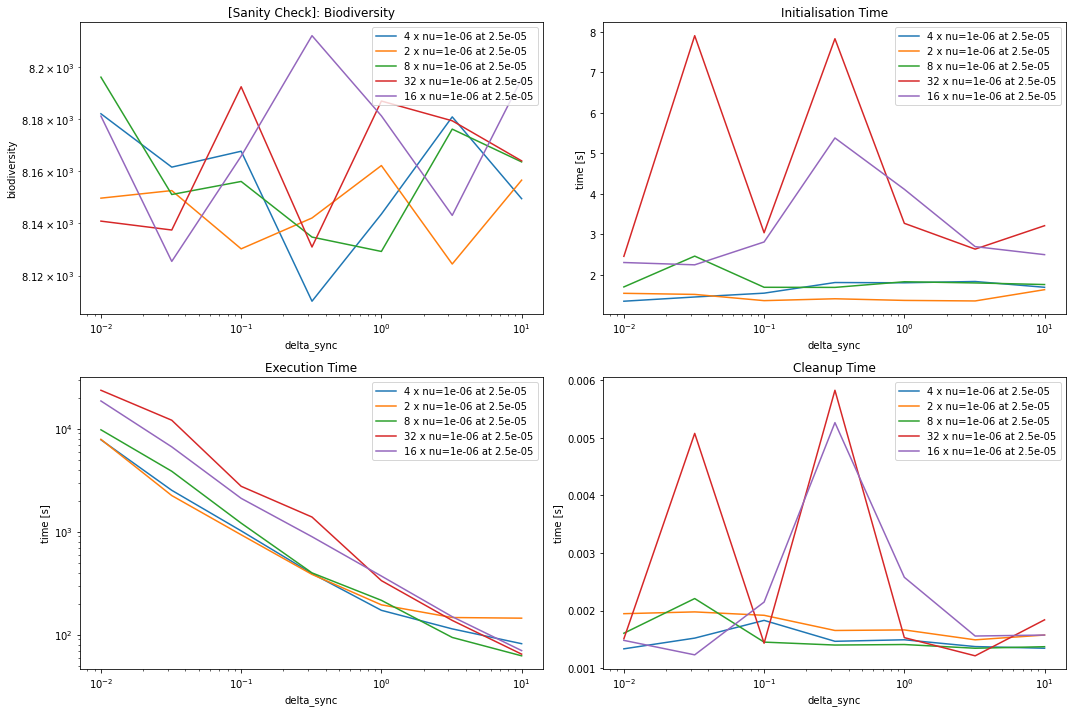

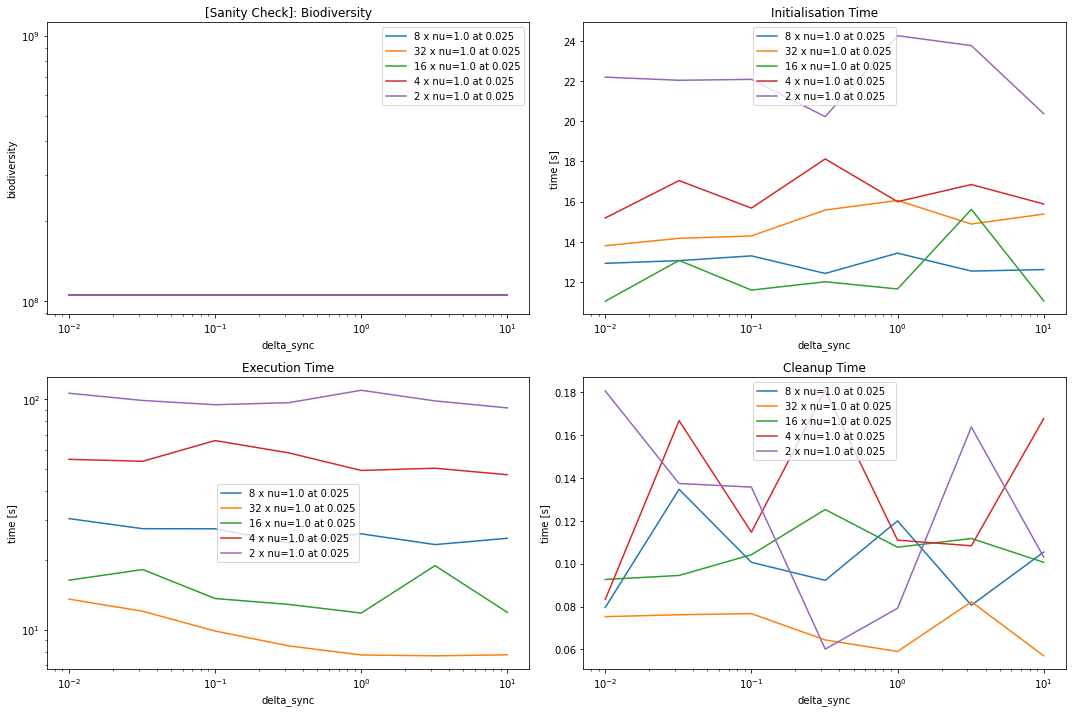

In [5]:
AVERAGING_FILE_PATTERN = re.compile(r"pbs\.(\d+)\.([+\-]?(?:0|[1-9]\d*)(?:\.\d*)?(?:[eE][+\-]?\d+)?)\.([+\-]?(?:0|[1-9]\d*)(?:\.\d*)?(?:[eE][+\-]?\d+)?)\.([+\-]?(?:0|[1-9]\d*)(?:\.\d*)?(?:[eE][+\-]?\d+)?)\.o\d+\.\d+")

results = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))

for path in Path("averaging").iterdir():
    match = AVERAGING_FILE_PATTERN.match(path.name)
    
    if match is None:
        continue
    
    partitions = int(match.group(1))
    speciation = float(match.group(2))
    sample = float(match.group(3))
    delta_sync = float(match.group(4))
    
    with open(path) as file:
        stdout = file.read()
    
    match = BIODIVERSITY_PATTERN.search(stdout)
    if match is None:
        continue
    biodiversity = int(match.group(1))

    match = EXECUTION_PATTERN.search(stdout)
    if match is None:
        continue
    initialisation = parse_time(match.group(1))
    execution = parse_time(match.group(2))
    cleanup = parse_time(match.group(3))
    
    results[(speciation, sample)][partitions][delta_sync].append((biodiversity, initialisation, execution, cleanup))
    
for (speciation, sample), entries in results.items():
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    
    ax1.set_title("[Sanity Check]: Biodiversity")
    ax1.set_xlabel("delta_sync")
    ax1.set_ylabel("biodiversity")
    ax1.set_xscale("log")
    ax1.set_yscale("log")
    
    ax2.set_title("Initialisation Time")
    ax2.set_xlabel("delta_sync")
    ax2.set_ylabel("time [s]")
    ax2.set_xscale("log")
    
    ax3.set_title("Execution Time")
    ax3.set_xlabel("delta_sync")
    ax3.set_ylabel("time [s]")
    ax3.set_xscale("log")
    ax3.set_yscale("log")
    
    ax4.set_title("Cleanup Time")
    ax4.set_xlabel("delta_sync")
    ax4.set_ylabel("time [s]")
    ax4.set_xscale("log")
    
    for partitions, measures in entries.items():
        measures = { delta_sync: [np.mean(s) for s in zip(*measure)] for delta_sync, measure in measures.items() }

        delta_syncs, biodiversities, initialisations, executions, cleanups = zip(*sorted([delta_sync] + rs for delta_sync, rs in measures.items()))

        ax1.plot(delta_syncs, biodiversities, label=f"{partitions} x nu={speciation} at {sample}")
        ax2.plot(delta_syncs, initialisations, label=f"{partitions} x nu={speciation} at {sample}")
        ax3.plot(delta_syncs, executions, label=f"{partitions} x nu={speciation} at {sample}")
        ax4.plot(delta_syncs, cleanups, label=f"{partitions} x nu={speciation} at {sample}")
    
    ax1.legend()
    ax2.legend()
    ax3.legend()
    ax4.legend()

    plt.tight_layout()
    plt.show()